# Data Visualizations

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [70]:
red_clean = pd.read_csv('/Users/divyasusarla/Desktop/DSI-SF-2-divyasusarla/Capstone/Clean_Data/red_wine_details_clean.csv', encoding='utf-8')

In [71]:
del red_clean['Unnamed: 0']
red_clean.head()

,wine_index,redwine,red_wineries,red_regions,red_countries,red_avg_wine_ratings,red_avg_price,vintage_year
0,0,La T\xe2che 1999,Domaine de la Roman\xe9e-Conti,C\xf4te de Nuits,France,4.9,4894.99,1999.0
1,1,Richebourg 2006,Domaine de la Roman\xe9e-Conti,C\xf4te de Nuits,France,4.9,1699.98,2006.0
2,2,Pessac-Leognan Premier Grand Cru Class\xe9 1961,Ch\xe2teau Haut-Brion,Pessac-Leognan,France,4.9,4146.94,1961.0
3,3,Roman\xe9e-Conti 2011,Domaine de la Roman\xe9e-Conti,C\xf4te de Nuits,France,4.8,11850.00,2011.0
4,4,C\xf4te-R\xf4tie La Mouline 1999,E. Guigal,Northern Rh\xf4ne,France,4.8,698.99,1999.0


# Scatter plot of wine vs. price:

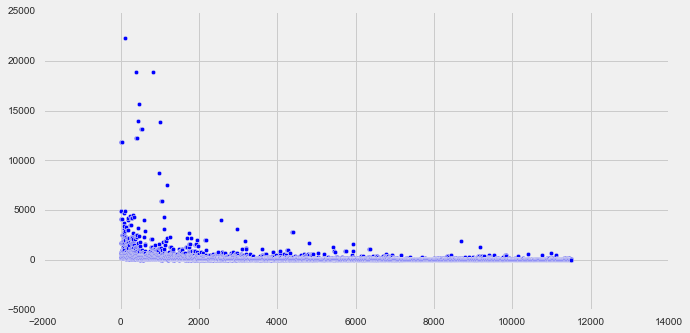

In [45]:
x = red_clean['wine_index']
y = red_clean['red_avg_price']

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x, y)
plt.show()

# Histogram of the range of prices for wines:

Given the wide range of prices, I want to bucket my wines into price ranges so I have a better sense of the spread:

In [72]:
red_clean['red_avg_price'].describe()

count    11510.000000
mean       166.092405
std        595.172210
min          4.960000
25%         43.980000
50%         70.040000
75%        134.980000
max      22249.990000
Name: red_avg_price, dtype: float64

In [73]:
def price_bins(value):
    if value <= 25:
        return 1
    if value > 25 and value <= 50:
        return 2
    if value > 50 and value <= 75:
        return 3
    if value > 75 and value <= 100:
        return 4
    if value > 100 and value <= 150:
        return 5
    if value > 150 and value <= 200:
        return 6
    if value > 200 and value <= 250:
        return 7
    if value > 250 and value <= 300:
        return 8
    if value > 300 and value <= 500:
        return 9
    if value > 500 and value <= 1000:
        return 10
    if value > 1000:
        return 11

In [74]:
red_clean['Price_Buckets'] = red_clean['red_avg_price'].map(price_bins)

In [75]:
red_clean.head()

,wine_index,redwine,red_wineries,red_regions,red_countries,red_avg_wine_ratings,red_avg_price,vintage_year,Price_Buckets
0,0,La T\xe2che 1999,Domaine de la Roman\xe9e-Conti,C\xf4te de Nuits,France,4.9,4894.99,1999.0,11
1,1,Richebourg 2006,Domaine de la Roman\xe9e-Conti,C\xf4te de Nuits,France,4.9,1699.98,2006.0,11
2,2,Pessac-Leognan Premier Grand Cru Class\xe9 1961,Ch\xe2teau Haut-Brion,Pessac-Leognan,France,4.9,4146.94,1961.0,11
3,3,Roman\xe9e-Conti 2011,Domaine de la Roman\xe9e-Conti,C\xf4te de Nuits,France,4.8,11850.00,2011.0,11
4,4,C\xf4te-R\xf4tie La Mouline 1999,E. Guigal,Northern Rh\xf4ne,France,4.8,698.99,1999.0,10


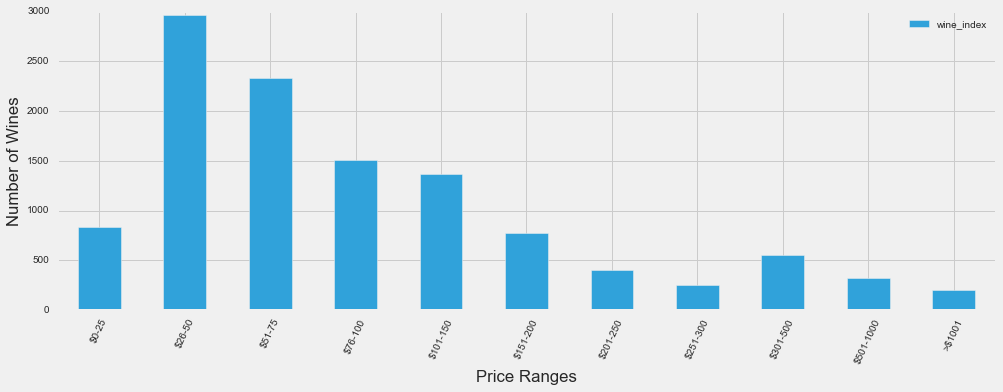

In [76]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()

red_clean.groupby('Price_Buckets')[['wine_index']].count().plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Price Ranges')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['$0-25', '$26-50', '$51-75', '$76-100', '$101-150', '$151-200', '$201-250',
                   '$251-300', '$301-500', '$501-1000', '>$1001'], rotation=65)

This chart helps to show the spread of wines across price ranges. As we can see, most of the wines fall in the 25 - 150 dollar range.

# Some more plotting - wines over regions and countries:

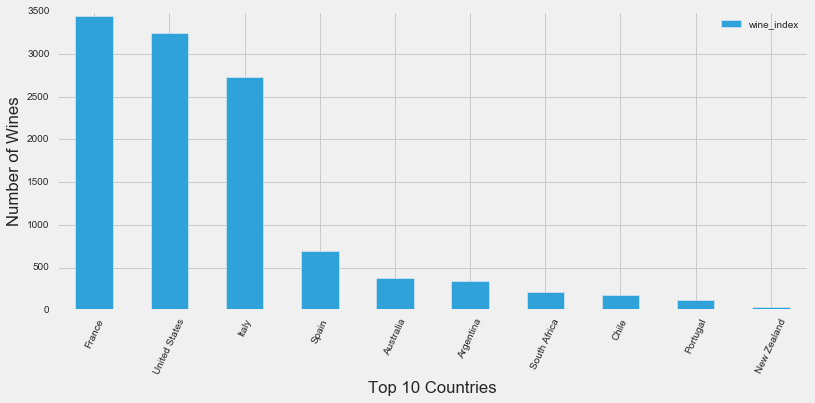

In [57]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

red_clean.groupby('red_countries')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(10).plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Top 10 Countries')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['France', 'United States', 'Italy', 'Spain', 'Australia', 'Argentina', 'South Africa',
                   'Chile', 'Portugal', 'New Zealand'], rotation=65)

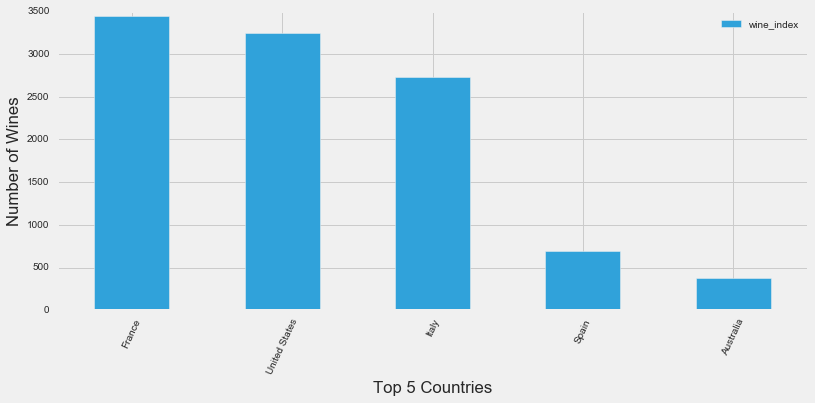

In [77]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

red_clean.groupby('red_countries')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(5).plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Top 5 Countries')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['France', 'United States', 'Italy', 'Spain', 'Australia'], rotation=65)

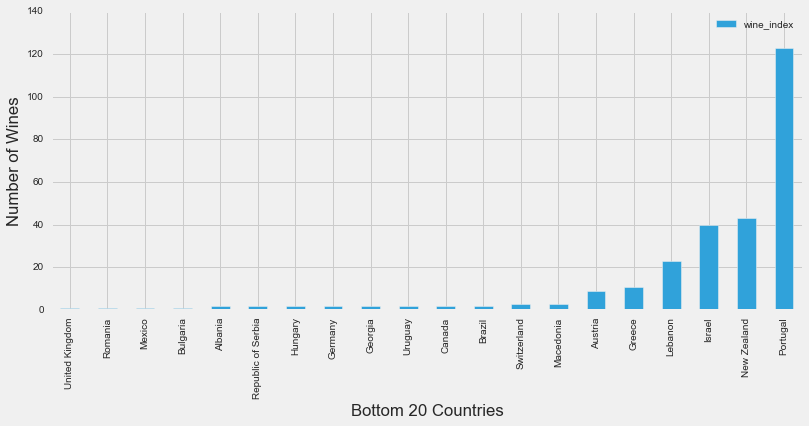

In [82]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

red_clean.groupby('red_countries')[['wine_index']].count().sort_values(
    'wine_index', ascending=True).head(20).plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Bottom 20 Countries')
ax.set_ylabel('Number of Wines')
# ax.set_xticklabels(rotation=65)

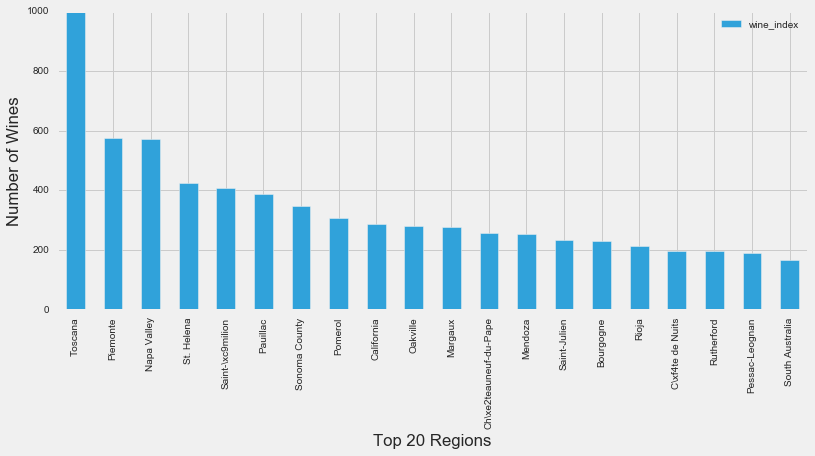

In [88]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

red_clean.groupby('red_regions')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(20).plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Top 20 Regions')
ax.set_ylabel('Number of Wines')
# need to reset labels here:
# ax.set_xticklabels(['France', 'United States', 'Italy', 'Spain', 'Australia', 'Argentina', 'South Africa',
#                    'Chile', 'Portugal', 'New Zealand'], rotation=65)

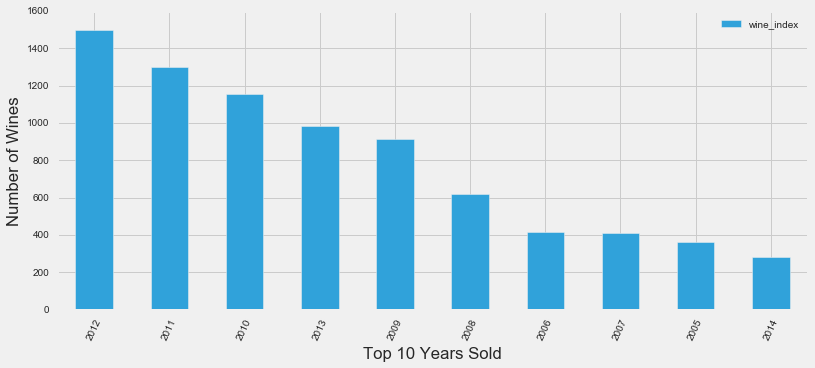

In [96]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

red_clean.groupby('vintage_year')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(10).plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Top 10 Years Sold')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['2012', '2011', '2010', '2013', '2009', '2008', '2006',
                   '2007', '2005', '2014'], rotation=65)

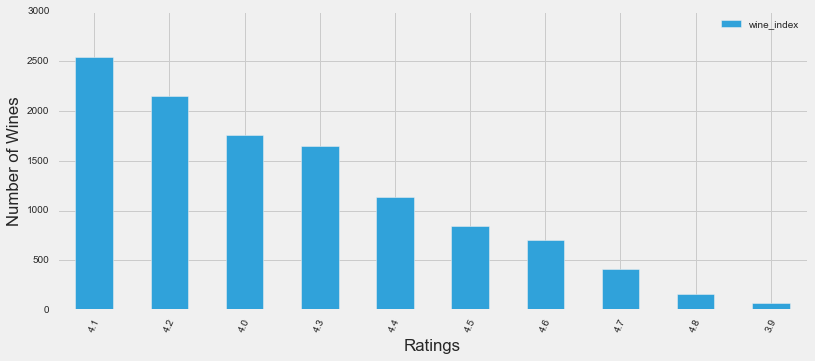

In [104]:
fig = plt.figure(figsize=(12,5))
ax = fig.gca()

red_clean.groupby('red_avg_wine_ratings')[['wine_index']].count().sort_values(
    'wine_index', ascending=False).head(10).plot.bar(stacked=False, ax=ax)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Wines')
ax.set_xticklabels(['4.1', '4.2', '4.0', '4.3', '4.4', '4.5', '4.6',
                   '4.7', '4.8', '3.9'], rotation=65)